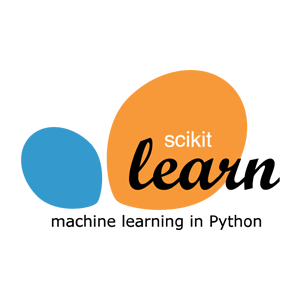

# Introduction to Scikit Learn

In this module, we are going to learn the basics of the Scikit-learn library, which is an incredible tool for data mining and data analysis. It is simple and efficient, and we will deep dive into it to learn many concepts.

Scikit Learn library offers a wide range of functions and classes organized into modules for different machine learning tasks. Here's a breakdown of the core functionalities.

1. Classification ==> In the Classification we are identifying the data that we have which category an object belogs to . we are used this concept in the Application of Spam detection, banking(like good loan or bad loan) and like other thigs.


2. Regression ==> In this Regression we are Predicting an attributes associated with an object . the Application of the Regression is Stock price prediction, weather forecasting and like other things.


3. Clustering ==> Automatic grouping of similar objects into sets and the application of the Clustering is Customer segmentation.


4. Model Selection ==> It is used for the Comparing, validating and choosing parameters and models for the specific problem to solve and the application of the model selection is Improving model accuracy via parameter tuning or fine tuning.


5. Dimensionality reduction ==> It is used for reducing the number of random variables to consider which is enhance or increase the model efficiency.


6. Pre-processing ==> It is used for feature extraction and normalization the application of this module is Transfroming input data such as text for use with machine learning algorithms.


In [1]:
# Importing all the required packages.

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
# Loading dataset 
wine = pd.read_csv('winequality-red.csv')

In [3]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1596 entries, 0 to 1595
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1596 non-null   float64
 1   volatile acidity      1596 non-null   float64
 2   citric acid           1596 non-null   float64
 3   residual sugar        1596 non-null   float64
 4   chlorides             1596 non-null   float64
 5   free sulfur dioxide   1596 non-null   float64
 6   total sulfur dioxide  1596 non-null   float64
 7   density               1596 non-null   float64
 8   pH                    1596 non-null   float64
 9   sulphates             1596 non-null   float64
 10  alcohol               1596 non-null   float64
 11  quality               1596 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 149.8 KB


In [5]:
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [6]:
# Preprocessing data
bins = (2, 6.8, 8)
group_names = ['bad', 'good']
wine['quality'] = pd.cut(wine['quality'], bins = bins, labels = group_names)
wine['quality'].unique()

['bad', 'good']
Categories (2, object): ['bad' < 'good']

In [7]:
label_quality = LabelEncoder()

In [8]:
wine['quality'] = label_quality.fit_transform(wine['quality'])

In [9]:
wine.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,0
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,0
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,1
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,0


In [10]:
wine['quality'].value_counts()

0    1379
1     217
Name: quality, dtype: int64

<Axes: ylabel='count'>

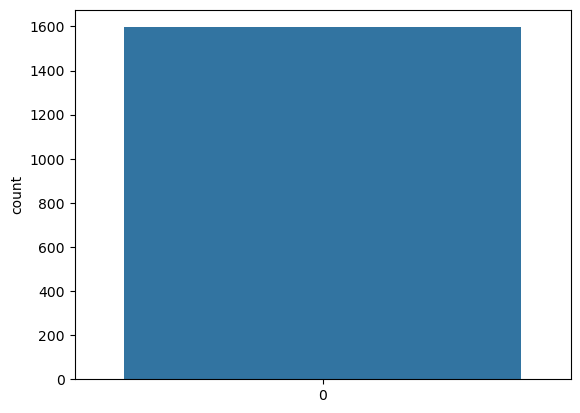

In [11]:
sns.countplot(wine['quality'])

In [12]:
# Now seperate the dataset as response variable and feature variables

X = wine.drop('quality', axis = 1)
y = wine['quality']

In [13]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0


In [14]:
# Train and Test splitting of data 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [15]:
# Applying standard scaling to get optimized result

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
X_train[:10]

array([[-1.26843280e+00, -1.15992969e+00, -1.16552574e-01,
        -1.71339971e-01, -3.48419349e-01,  6.81596039e-01,
         3.32657330e-01, -2.10477887e-01,  7.05309843e-01,
         1.86378152e+00,  1.68143759e-01],
       [ 1.62417171e-01, -1.10356109e+00,  6.56962079e-01,
         4.45196336e-02, -1.02169773e-01,  3.60552501e-03,
         6.33146325e-01,  5.78436588e-01, -7.01410306e-02,
        -1.07728849e+00, -9.62562098e-01],
       [ 1.82220314e+00, -1.18811399e+00,  1.37890909e+00,
        -3.15246374e-01, -8.16489746e-02, -1.06180814e+00,
        -9.59445345e-01,  1.04437265e+00, -2.13801003e+00,
         2.43191925e-01, -1.15101307e+00],
       [ 1.87943714e+00, -2.86216417e-01,  6.56962079e-01,
        -8.18918784e-01,  6.19966116e-02, -9.64952352e-01,
        -5.68809653e-01,  1.65447802e-01, -1.55642187e+00,
        -5.69172591e-02, -3.65800677e-01],
       [ 3.34119167e-01, -2.58032117e-01,  1.32734145e+00,
         1.05186445e+00,  2.67204592e-01, -1.25551972e+00,
  

# Random Forest Classifier 

In [17]:
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)
pred_rfc = rfc.predict(X_test)

In [18]:
pred_rfc[:20]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0])

In [19]:
# how our model performed
print(classification_report(y_test, pred_rfc))
print(confusion_matrix(y_test, pred_rfc))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       277
           1       0.75      0.42      0.54        43

    accuracy                           0.90       320
   macro avg       0.83      0.70      0.74       320
weighted avg       0.89      0.90      0.89       320

[[271   6]
 [ 25  18]]


# SVM Classifier

In [20]:
clf = svm.SVC()
clf.fit(X_train, y_train)
pred_clf = clf.predict(X_test)

In [21]:
# how our model performed
print(classification_report(y_test, pred_clf))
print(confusion_matrix(y_test, pred_clf))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       277
           1       0.69      0.26      0.37        43

    accuracy                           0.88       320
   macro avg       0.79      0.62      0.65       320
weighted avg       0.87      0.88      0.86       320

[[272   5]
 [ 32  11]]


# Neural Network 

mlpc = Multilayer_perceptorn classifier

In [22]:
from sklearn.metrics import accuracy_score

In [23]:
# model prediction on the 30 hidden layer size  and max_iter is 500 
mlpc = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=500)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [24]:
# how our model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       277
           1       0.61      0.58      0.60        43

    accuracy                           0.89       320
   macro avg       0.77      0.76      0.77       320
weighted avg       0.89      0.89      0.89       320

[[261  16]
 [ 18  25]]


In [25]:
acc = accuracy_score(y_test, pred_mlpc)
print('Accuracy of our model which is use the MultiLayerPerceptron Classifieris: ')
acc*100 # if you multiply by 100 it return the value in the range of 1-100

Accuracy of our model which is use the MultiLayerPerceptron Classifieris: 


89.375

In [26]:
# model prediction on the 50 hidden layer size and max_iter is 1000 

mlpc = MLPClassifier(hidden_layer_sizes=(50,50,50), max_iter=1000)
mlpc.fit(X_train, y_train)
pred_mlpc = mlpc.predict(X_test)

In [27]:
# how our model performed
print(classification_report(y_test, pred_mlpc))
print(confusion_matrix(y_test, pred_mlpc))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94       277
           1       0.62      0.49      0.55        43

    accuracy                           0.89       320
   macro avg       0.77      0.72      0.74       320
weighted avg       0.88      0.89      0.89       320

[[264  13]
 [ 22  21]]


In [28]:
acc = accuracy_score(y_test, pred_mlpc)
print('Accuracy of our model which is use the MultiLayerPerceptron Classifieris: ')
acc*100 # if you multiply by 100 it return the value in the range of 1-100

Accuracy of our model which is use the MultiLayerPerceptron Classifieris: 


89.0625

In [29]:
cm = accuracy_score(y_test, pred_rfc)

In [30]:
print('Accuracy of our model which is use the Random forest Classification is: ')
cm*100 # if you multiply by 100 it return the value in the range of 1-100

Accuracy of our model which is use the Random forest Classification is: 


90.3125

In [31]:
pre = accuracy_score(y_test, pred_clf)
print('Accuracy of our model which is use the SVM Classifier is: ')
pre*100 # if you multiply by 100 it return the value in the range of 1-100

Accuracy of our model which is use the SVM Classifier is: 


88.4375

In [33]:
Xnew = [[7.3, 0.58, 0.00, 2.0, 0.065, 15.0, 21.0, 0.9946, 3.36, 0.47, 10.0]]
Xnew = sc.transform(Xnew)
ynew = rfc.predict(Xnew)
ynew

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([0])